## Importing Dependencies

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM, GRU, ConvLSTM2D, Flatten, Conv1D, Reshape, AveragePooling1D
import numpy as np
from tensorflow import keras
import random
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from data import getDataLSTM, getDataConvLSTM

TensorFlow 2.x selected.


## Mounting Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root = 'drive/My Drive/data_numpy/'

## Getting Labels

In [0]:
from labels import getLabels

In [0]:
labels_to_idx, idx_to_labels = getLabels('drive/My Drive/data_numpy/')

In [7]:
list(zip(labels_to_idx, idx_to_labels))

[('rashmi', 0),
 ('goel', 1),
 ('saboo', 2),
 ('bhairevi', 3),
 ('shivam', 4),
 ('vaibhav', 5),
 ('aman', 6),
 ('priyanka', 7),
 ('prateek', 8),
 ('shruti', 9),
 ('anurag', 10),
 ('sanket', 11),
 ('praveen', 12),
 ('vinay', 13),
 ('jagrit', 14),
 ('shrey', 15),
 ('akbar', 16),
 ('kartik', 17),
 ('samridh', 18),
 ('ravinder', 19),
 ('staff', 20),
 ('dash', 21),
 ('pradeep', 22),
 ('lakshya', 23)]

## ConvLSTM Model

In [0]:
# define model
model = Sequential()
model.add(ConvLSTM2D(32, kernel_size=(7,2),padding='same',input_shape=(None, 25, 2, 1),return_sequences=True))
model.add(ConvLSTM2D(64, kernel_size=(5,2), padding='same'))
model.add(Flatten())
model.add(Reshape((3200, 1)))
model.add(Conv1D(filters=8, kernel_size=3, activation='relu', padding='same', input_shape=(3200,1)))
model.add(Conv1D(filters=8, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=8, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=22, kernel_size=1, padding='same', activation='relu'))
model.add(AveragePooling1D(pool_size=3200))
model.add(Flatten())
model.add(Dense(22, activation='softmax'))

## Optimizer

In [0]:
 adam = tf.keras.optimizers.Adam(learning_rate=1e-4,beta_1=0.9,beta_2=0.999)

## Model Compile

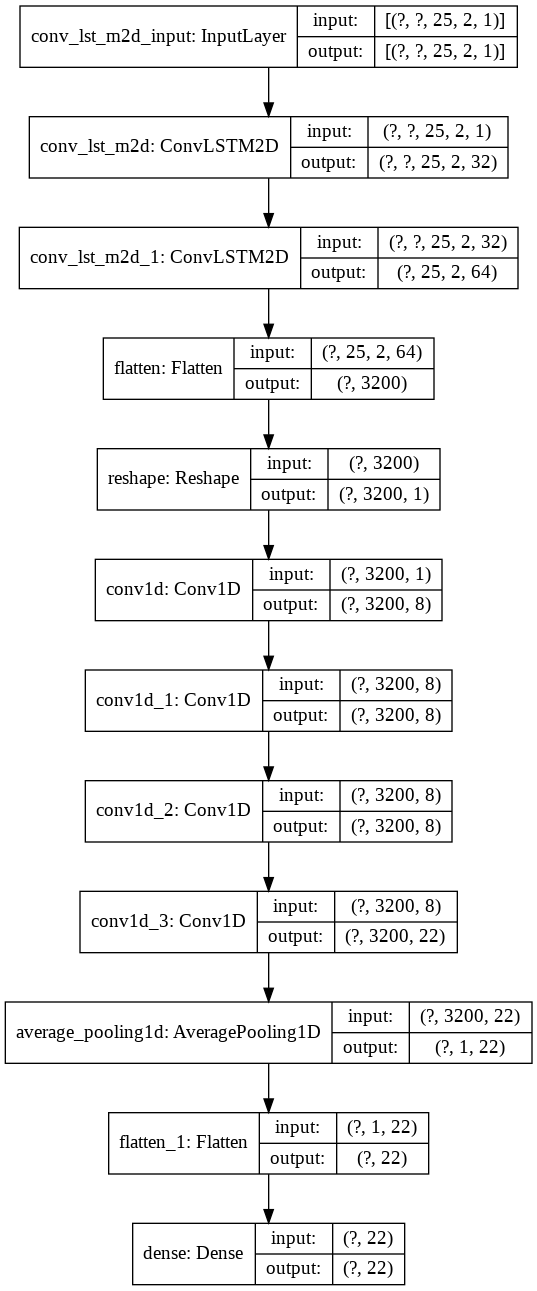

In [10]:
model.compile(optimizer=adam, loss='categorical_crossentropy')
keras.utils.plot_model(model, show_shapes=True, to_file='lstm_encoder.png')

## Train Test Split

In [0]:
train_data, test_data = getDataConvLSTM(root, batch_size=10)

## Model Fit

In [12]:
# fit model
model.fit(train_data.repeat(1), epochs=50, verbose=1, validation_data=test_data)

Epoch 1/50
9/9 [==============================] - 13s 1s/step - loss: 766.9222 - val_loss: 0.0000e+00
Epoch 2/50
9/9 [==============================] - 4s 424ms/step - loss: 740.9655 - val_loss: 918.6066
Epoch 3/50
9/9 [==============================] - 4s 427ms/step - loss: 761.3666 - val_loss: 903.3063
Epoch 4/50
9/9 [==============================] - 4s 408ms/step - loss: 760.6114 - val_loss: 915.7742
Epoch 5/50
9/9 [==============================] - 4s 417ms/step - loss: 764.3900 - val_loss: 891.4074
Epoch 6/50
9/9 [==============================] - 4s 423ms/step - loss: 759.1017 - val_loss: 901.6089
Epoch 7/50
9/9 [==============================] - 4s 401ms/step - loss: 751.5468 - val_loss: 901.6104
Epoch 8/50
9/9 [==============================] - 4s 405ms/step - loss: 769.6823 - val_loss: 906.7122
Epoch 9/50
9/9 [==============================] - 4s 406ms/step - loss: 786.3068 - val_loss: 898.2138
Epoch 10/50
9/9 [==============================] - 4s 410ms/step - loss: 762.8852 

## Model Predict

In [0]:
y_pred = model.predict(test_data, verbose=0,)

In [16]:
y_pred.shape

(28, 22)

In [17]:
y_pred 

array([[0.03214743, 0.04689776, 0.06662347, 0.02368383, 0.07334669,
        0.02070168, 0.0571186 , 0.04686207, 0.04374241, 0.04672016,
        0.02914646, 0.06713421, 0.02735863, 0.05528541, 0.02143585,
        0.03908186, 0.05240608, 0.02855929, 0.09573746, 0.01364929,
        0.03131807, 0.08104327],
       [0.03214743, 0.04689776, 0.06662347, 0.02368383, 0.07334669,
        0.02070168, 0.0571186 , 0.04686207, 0.04374241, 0.04672016,
        0.02914646, 0.06713421, 0.02735863, 0.05528541, 0.02143585,
        0.03908186, 0.05240608, 0.02855929, 0.09573746, 0.01364929,
        0.03131807, 0.08104327],
       [0.03214743, 0.04689776, 0.06662347, 0.02368383, 0.07334669,
        0.02070168, 0.0571186 , 0.04686207, 0.04374241, 0.04672016,
        0.02914646, 0.06713421, 0.02735863, 0.05528541, 0.02143585,
        0.03908186, 0.05240608, 0.02855929, 0.09573746, 0.01364929,
        0.03131807, 0.08104327],
       [0.03214743, 0.04689776, 0.06662347, 0.02368383, 0.07334669,
        0.0207016

## Encoder Model

In [0]:
model = keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)

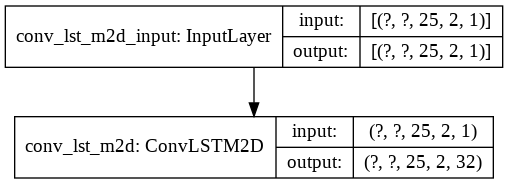

In [22]:
keras.utils.plot_model(model, show_shapes=True, to_file='lstm_encoder.png')

In [23]:
#feature vector for the input sequence
yhat = model.predict(test_data)
print(yhat.shape)
print(yhat)

(28, 37, 25, 2, 32)
[[[[[ 2.79930644e-02  3.81583651e-03  7.81767163e-03 ...
     -3.11123533e-03  1.49550941e-02 -8.93692952e-03]
    [ 3.27672274e-03  4.32785740e-03 -2.30387971e-03 ...
      2.70950585e-03  2.37815012e-03 -2.66997633e-03]]

   [[ 3.43129374e-02  9.88639798e-03  5.52975340e-03 ...
      9.02700238e-04  1.86492596e-02 -1.42755536e-02]
    [ 3.65444319e-03  4.05501667e-03 -1.78685365e-03 ...
      2.22787587e-03  2.90437811e-03 -2.66115088e-03]]

   [[ 2.71343384e-02  1.91028286e-02 -9.55986977e-03 ...
      1.30595462e-02  1.14494571e-02 -2.25429405e-02]
    [ 3.74180498e-03  4.33859229e-03 -2.58325390e-03 ...
      2.71565095e-03  2.80551077e-03 -2.54398584e-03]]

   ...

   [[ 2.61694919e-02  1.28346393e-02 -6.89445762e-03 ...
      7.43566500e-03  1.24472966e-02 -1.73726641e-02]
    [ 4.61255806e-03  4.15482977e-03 -2.43666698e-03 ...
      2.51553929e-03  3.38828447e-03 -2.94958660e-03]]

   [[ 2.57812794e-02  2.05795709e-02  2.69107870e-04 ...
      1.01155620e-0